# Sales Prediction Using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.duplicated().sum()

0

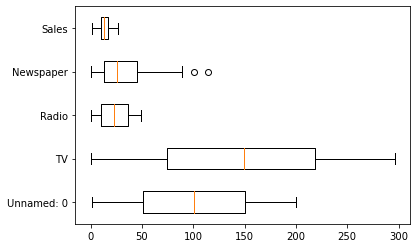

In [9]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

from the above boxplot it is clear that Newspaper column has the outliers but as per problem statement these outliers may play very important role for the prediction of future sales so i decide not to remove it

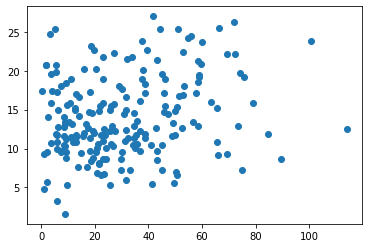

In [10]:
plt.scatter(data=df ,x="Newspaper", y="Sales")

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

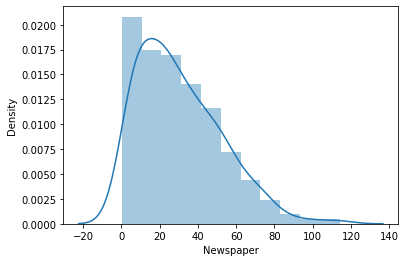

In [11]:
sns.distplot(df['Newspaper'])

C:\Users\Yash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Radio', ylabel='Density'>

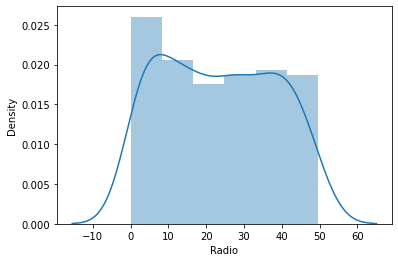

In [12]:
sns.distplot(df['Radio'])

In [13]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [14]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [15]:
x = df.drop('Sales',axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
y=df['Sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=3)

In [18]:
xtrain

,TV,Radio,Newspaper
77,120.5,28.5,14.2
73,129.4,5.7,31.3
71,109.8,14.3,31.7
78,5.4,29.9,9.4
42,293.6,27.7,1.8
...,...,...,...
0,230.1,37.8,69.2
184,253.8,21.3,30.0
131,265.2,2.9,43.0
152,197.6,23.3,14.2


In [19]:
ytrain

77     14.2
73     11.0
71     12.4
78      5.3
42     20.7
       ... 
0      22.1
184    17.6
131    12.7
152    16.6
106     7.2
Name: Sales, Length: 140, dtype: float64

In [20]:
xtest.head()

,TV,Radio,Newspaper
40,202.5,22.3,31.6
51,100.4,9.6,3.6
139,184.9,43.9,1.7
197,177.0,9.3,6.4
170,50.0,11.6,18.4


In [21]:
ytest.head()

40     16.6
51     10.7
139    20.7
197    12.8
170     8.4
Name: Sales, dtype: float64

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [23]:
model.fit(xtrain,ytrain)

LinearRegression()

In [24]:
ypred=model.predict(xtest)
ypred

array([16.23908522,  9.61974227, 19.70411458, 12.83758096,  7.75117142,
       10.39614031, 23.56568814,  9.04287249, 17.61434029, 13.61264994,
       12.41895295, 14.63059421, 15.36549523, 12.91196831, 12.44967293,
       12.02022165, 16.18805828, 17.47379948, 17.19147955, 21.69255609,
       18.22173873,  8.90050617, 10.7849561 , 12.02942207,  6.84754722,
       13.66447529, 22.17451249, 13.50945016, 22.52702726, 11.88138574,
       17.03988139, 21.52399711, 10.71565512,  7.85644348, 10.20198234,
        8.44594245, 13.001148  , 10.77141583, 12.17524762,  9.8569604 ,
       15.45704842, 13.04055175,  5.84887331, 20.59192848, 22.47250008,
       24.37729901, 14.37760834, 10.94824196, 16.36148492, 18.13598497,
       11.43279278, 14.72792516, 16.94299022,  8.98448136, 19.51641741,
       10.89477891, 22.74714758, 21.18575245, 15.70986415, 14.876838  ])

In [25]:
model.score(xtrain,ytrain)*100

90.46393841056695

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypred)

4.071612632911022

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)*100

87.60893953712909

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)

1.3857180211426168

In [29]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

2.017823736829117

In [30]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [31]:
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

0.8910650514774895

In [32]:
param_grid = {'normalize':['deprecated'],
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }

In [33]:
grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [34]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'normalize': ['deprecated'],
                         'positive': [False]})

In [35]:
grid_model.estimator

LinearRegression()

In [36]:
grid_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_jobs': -1,
 'param_grid': {'normalize': ['deprecated'],
  'copy_X': [True],
  'n_jobs': [-1, 1, 2, -2],
  'positive': [False],
  'fit_intercept': [True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [37]:
grid_model.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -1,
 'normalize': 'deprecated',
 'positive': False}

In [38]:
grid_model.best_score_

0.8972778451784489

# Lasso

In [39]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.8762105126953927

In [40]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [41]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [42]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'normalize': ['deprecated'],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [43]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'normalize': ['deprecated'], 'positive': [False],
                         'random_state': [0], 'selection': ['cyclic']})

In [44]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.8760978027678453